# 01 - Criando Séries Temporais
Esse notebook mostra algumas formas de criar e séries temporais através de dados transacionais. Iremos usar uma tabela com os lançamentos da Netflix. Mais informações sobre a tabela [aqui]((https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/code).)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/danielferreira/Documents/git/ik_classes/ASN/Time Series/data/netflix_titles.csv')

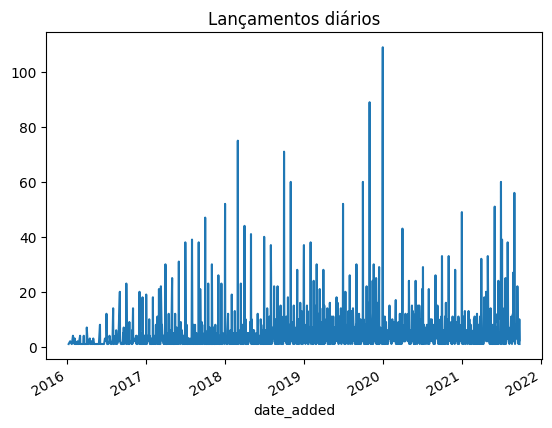

In [8]:
df['date_added']=pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df = df[df['date_added']>'2016-01-01']
series = df.groupby('date_added')['show_id'].count()
series.plot()
plt.title('Lançamentos diários')
plt.show()